# SVM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from matplotlib import  pyplot as plt

data1 = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/2nd/OverSample/Cleaned data-Nancy(before sub-sample).csv")
dataN = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/2nd/OverSample/Cleaned Sub-oversample-Nancy.csv")

In [2]:
X=data1.drop(columns="July_Payment_Status")
y=data1["July_Payment_Status"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=30)

In [3]:
Xn=data1.drop(columns="July_Payment_Status")
yn=data1["July_Payment_Status"]
Xntrain, Xntest, Yntrain, Yntest = train_test_split(Xn, yn, test_size=0.3, random_state=30)

## Normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

mmsn = MinMaxScaler().fit(Xntrain)
Xntrain_ = mmsn.transform(Xntrain)
Xntest_ = mms.transform(Xntest)

In [18]:
#Orighinal 
clf = SVC(kernel = "rbf").fit(Xtrain, Ytrain)
y_pred= clf.predict(Xtest)
score = clf.score(Xtest, Ytest)
#print("Sub-sample:"score)
score

0.7733071638861629

In [20]:
# Sub-sample
clfn = SVC(kernel = "rbf").fit(Xntrain, Yntrain)
yn_pred= clf.predict(Xtest)
scoren= clfn.score(Xntest, Yntest)
#print("Sub-sample:" scoren)
scoren

0.7733071638861629

In [6]:
#clf = SVC(kernel = "sigmoid").fit(Xtrain, Ytrain)
#clf.score(Xtest, Ytest)

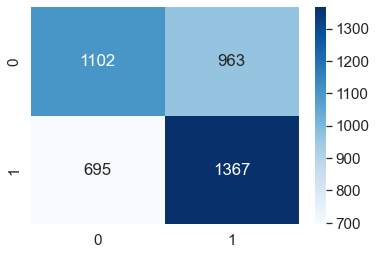

In [7]:
cm = confusion_matrix(Ytest, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [8]:
import warnings
warnings.filterwarnings('ignore')
print(classification_report(Ytest, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.613244  0.533656  0.570689      2065
           1   0.586695  0.662949  0.622495      2062

    accuracy                       0.598255      4127
   macro avg   0.599970  0.598302  0.596592      4127
weighted avg   0.599979  0.598255  0.596573      4127

